In [8]:
%matplotlib inline
import cv2
import cPickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier
from collections import Counter
from scipy.stats.mstats import mode
import sklearn
from sklearn.naive_bayes import MultinomialNB
from math import sqrt
import scipy.stats as st

In [9]:
#function to unpickle the dataset
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

In [10]:
#storing the unpickled data into a dictionary called my_data
my_data = {'data': unpickle("data_batch_1")['data'], 'labels': unpickle("data_batch_1")['labels']}
for each in range(2, 6):
    my_data['data'] = np.concatenate((my_data['data'], unpickle("data_batch_" + str(each))['data']), axis=0)
    my_data['labels'] = np.concatenate((my_data['labels'], unpickle("data_batch_" + str(each))['labels']), axis=0)

In [11]:
# assigning the data and labels to respective lists
data = my_data['data']
labels = my_data['labels']
label_names = unpickle("batches.meta")['label_names']

In [12]:
# assigning the data and labels to respective lists
X_train = my_data['data']
y_train = my_data['labels']
label_names = unpickle("batches.meta")['label_names']

In [13]:
# unpickling the test data and storing in a dictionary called test_data
test_data = {}
test_data.update(unpickle("test_batch"))
X_test = test_data['data']
y_test = test_data['labels']

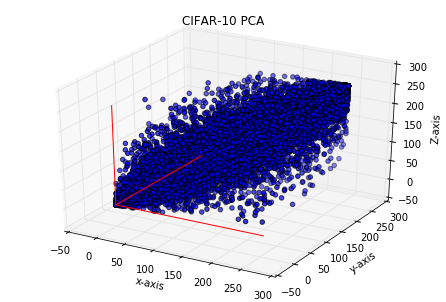

In [14]:
#plotting the feature points
x1 = []
y1 = []
z1 = []
for item in X_train:
 x1.append(item[0])
 y1.append(item[1])
 z1.append(item[2])
fig1 = plt.figure() 
ax = Axes3D(fig1) 
pltData = [x1,y1,z1] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') 


xLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) 
ax.plot(xLine[0], xLine[1], xLine[2], 'r') 
yLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) 
ax.plot(yLine[0], yLine[1], yLine[2], 'r')
zLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2])))
ax.plot(zLine[0], zLine[1], zLine[2], 'r') 
 
 
ax.set_xlabel("x-axis") 
ax.set_ylabel("y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("CIFAR-10 PCA")
plt.show()

In [15]:
#performs canny edge detection
edges ={}
edges = cv2.Canny(data,100,200)
edges

array([[  0,   0,   0, ...,   0, 255, 255],
       [255, 255, 255, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       ..., 
       [  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [16]:
# Initiate STAR detector
orb = cv2.ORB()

# find the keypoints with ORB
kp = orb.detect(data,None)

# compute the descriptors with ORB
kp, des = orb.compute(data, kp)
kp
des

array([[173, 211, 122, ..., 179, 242, 162],
       [185, 232,  11, ...,  28,  10, 218],
       [125, 151, 194, ..., 254, 172,  92],
       ..., 
       [189, 169, 224, ..., 117, 243, 226],
       [158, 187, 101, ..., 135, 164, 254],
       [ 56, 225, 151, ...,  90, 162, 138]], dtype=uint8)

In [17]:
#computing the principle components
X = np.array(X_train)
pca = PCA(n_components=9)
abc = pca.fit_transform(X)
pca1 = pca.score(X)
abc,pca1

(array([[-1632.25949567,  -695.90488454,   382.93618337, ...,
           145.09231503,    23.68351631,   880.20153394],
        [  211.59476313,   242.23552082,  1530.95691173, ...,
           154.75502643,  -133.3870243 ,   658.95822497],
        [ 1971.20094327,  2938.13609429,  -702.17322884, ...,
          -155.66157094,  -347.14624518,  -186.38150476],
        ..., 
        [  180.37337958,  2892.34291617,  -100.44829397, ...,
          -242.04567054,  -222.82523441,  -398.39020962],
        [ 2898.8167988 ,   860.87430085,  1419.38040211, ...,
           826.73873085,    18.32665521,  -407.9150019 ],
        [ 1069.16309571,   301.96806297, -1133.72055689, ...,
          1147.47023613,  -478.9788285 ,   278.29690889]]),
 -15569.645002456691)

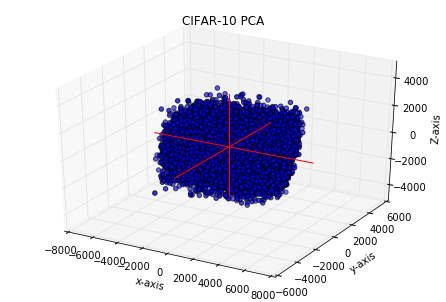

In [18]:
#plotting the principle components
x1 = []
y1 = []
z1 = []
for item in abc:
 x1.append(item[0])
 y1.append(item[1])
 z1.append(item[2])
fig1 = plt.figure() 
ax = Axes3D(fig1) 
pltData = [x1,y1,z1] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') 
xLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) 
ax.plot(xLine[0], xLine[1], xLine[2], 'r') 
yLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) 
ax.plot(yLine[0], yLine[1], yLine[2], 'r')
zLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2])))
ax.plot(zLine[0], zLine[1], zLine[2], 'r')  
ax.set_xlabel("x-axis") 
ax.set_ylabel("y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("CIFAR-10 PCA")
plt.show()

In [19]:
#creating dictionaries of each class of images in training set
class_data = {'airplane': [], 'automobile': [],'bird':[],'cat':[], 'deer':[], 'dog':[],'frog':[],'horse':[], 'ship':[], 'truck':[]}

In [20]:
#creating dictionaries of each class of images in test set
class_data_test = {'airplane': [], 'automobile': [],'bird':[],'cat':[], 'deer':[], 'dog':[],'frog':[],'horse':[], 'ship':[], 'truck':[]}

In [21]:
# appending each class images in the training set based on the labels
for each in range(0, 50000):
    if y_train[each] == 0:
        class_data['airplane'].append(X_train[each])
    if y_train[each] == 1:
        class_data['automobile'].append(X_train[each])
    if y_train[each] == 2:
        class_data['bird'].append(X_train[each])
    if y_train[each] == 3:
        class_data['cat'].append(X_train[each])
    if y_train[each] == 4:    
        class_data['deer'].append(X_train[each])
    if y_train[each] == 5:     
        class_data['dog'].append(X_train[each])
    if y_train[each] == 6:    
        class_data['frog'].append(X_train[each])
    if y_train[each] == 7:    
        class_data['horse'].append(X_train[each])
    if y_train[each] == 8:    
        class_data['ship'].append(X_train[each])
    if y_train[each] == 9:    
        class_data['truck'].append(X_train[each])

In [22]:
# appending each class images in the test set based on the labels
for each in range(0, 10000):
    if y_test[each] == 0:
        class_data_test['airplane'].append(X_test[each])
    if y_test[each] == 1:
        class_data_test['automobile'].append(X_test[each])
    if y_test[each] == 2:
        class_data_test['bird'].append(X_test[each])
    if y_test[each] == 3:
        class_data_test['cat'].append(X_test[each])
    if y_test[each] == 4:    
        class_data_test['deer'].append(X_test[each])
    if y_test[each] == 5:     
        class_data_test['dog'].append(X_test[each])
    if y_test[each] == 6:    
        class_data_test['frog'].append(X_test[each])
    if y_test[each] == 7:    
        class_data_test['horse'].append(X_test[each])
    if y_test[each] == 8:    
        class_data_test['ship'].append(X_test[each])
    if y_test[each] == 9:    
        class_data_test['truck'].append(X_test[each])

In [23]:
# function to calculate mean ,variance, and standard deviation for each class of images
def get_stats(class_name):
    mean = 0
    variance = 0
    std_deviation = 0
    size = len(class_data[class_name])
    for each in class_data[class_name]:
        mean += each.mean()
        variance += each.var()
        std_deviation += each.std()
    mean = mean / size
    variance = variance / size
    std_deviation = std_deviation / size
    return mean, variance, std_deviation, size

In [24]:
get_stats('airplane'), get_stats('automobile'),get_stats('bird'),get_stats('cat'), get_stats('deer'),get_stats('dog'),get_stats('frog'),get_stats('horse'),get_stats('ship'),get_stats('truck')

((142.36578476562482, 2924.7899961870089, 52.11074562820145, 5000),
 (116.69753678385406, 3781.7569219946654, 60.461195116756706, 5000),
 (119.4055964843751, 2351.599560594409, 46.488452113801365, 5000),
 (116.23182356770872, 3247.6759663442335, 55.296425392169134, 5000),
 (111.77529895833335, 2244.2227886827513, 45.602521054650701, 5000),
 (117.3942397135415, 3240.4932403864404, 55.386333571030036, 5000),
 (106.56193378906262, 2441.6329934169316, 47.743113527541148, 5000),
 (118.89019752604152, 3339.1040125604759, 56.402123653561276, 5000),
 (133.47602604166627, 3202.4063655469163, 55.06245961941994, 5000),
 (124.27721360677087, 4175.3239258167496, 63.622319176562328, 5000))

In [25]:
# function to calculate the t-value for the classes of images that are being compared
def tstat(class_name1, class_name2):
    X1 = get_stats(class_name1)[0]
    X2 = get_stats(class_name2)[0]
    S1 = get_stats(class_name1)[1]
    S2 = get_stats(class_name2)[1]
    N1=5000
    N2=5000
    t1= X1-X2
    t2= sqrt((S1/N1+S2/N2))
    t11=t1/t2
    S1 = get_stats(class_name1)[1]
    S2 = get_stats(class_name2)[1]
    sum1 =((get_stats(class_name1)[1]+get_stats(class_name2)[1]))*((get_stats(class_name1)[1]+get_stats(class_name2)[1]))
    s14 =(get_stats(class_name1)[1]*get_stats(class_name1)[1])
    s24=(get_stats(class_name2)[1]*get_stats(class_name2)[1])
    n1 = 5000*5000
    v1= 4999
    n2 = 5000*5000
    v2=4999
    sum2=  (s14/n1*v1 + s24/n2*v2)
    df1 = (sum1/sum2)
    df= df1/10000
    p_value = 2*st.t.cdf(-np.abs(t11),df)
    if p_value<= 0.5:
        print(False)
    else:
        print (True)
    return t11, df, p_value

In [26]:
tstat('airplane','deer')

False


(30.086216271911557, 0.98315689824378627, 0.022329957778068975)

In [27]:
#performing k-means clustering with 10 clusters each for each class of images
k_means = KMeans(n_clusters=10, n_jobs=8)
k_means.fit(X_train)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=8, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [28]:
k_means.predict(class_data_test['airplane'])

array([8, 9, 3, 2, 2, 7, 8, 9, 9, 3, 9, 9, 6, 1, 4, 2, 8, 8, 2, 6, 7, 3, 9,
       2, 2, 1, 8, 8, 1, 3, 2, 6, 8, 8, 3, 9, 3, 1, 3, 8, 2, 8, 0, 3, 0, 9,
       1, 2, 7, 5, 3, 6, 2, 9, 2, 5, 3, 3, 3, 9, 9, 2, 2, 9, 1, 0, 1, 8, 8,
       9, 6, 3, 6, 9, 1, 0, 3, 6, 8, 1, 0, 2, 7, 8, 9, 9, 3, 6, 3, 3, 8, 0,
       1, 5, 6, 1, 8, 0, 1, 9, 8, 7, 9, 7, 9, 9, 3, 2, 5, 4, 5, 7, 1, 0, 3,
       9, 3, 8, 3, 1, 9, 6, 0, 5, 0, 3, 0, 6, 3, 7, 0, 9, 1, 2, 9, 0, 3, 2,
       2, 8, 3, 3, 3, 8, 0, 1, 9, 0, 8, 2, 9, 0, 6, 8, 9, 7, 3, 3, 9, 1, 3,
       4, 3, 0, 0, 4, 7, 9, 8, 9, 0, 6, 6, 3, 3, 0, 9, 9, 1, 0, 0, 1, 4, 3,
       9, 0, 6, 1, 8, 9, 0, 9, 9, 7, 1, 9, 0, 3, 8, 0, 1, 1, 3, 7, 3, 7, 8,
       2, 6, 6, 3, 9, 3, 6, 9, 9, 2, 9, 0, 6, 2, 9, 5, 9, 9, 7, 0, 3, 1, 3,
       2, 9, 7, 9, 3, 0, 3, 9, 4, 4, 3, 5, 0, 0, 8, 9, 3, 9, 8, 6, 9, 0, 6,
       6, 9, 3, 9, 0, 8, 2, 9, 9, 8, 9, 3, 6, 1, 3, 9, 6, 8, 2, 8, 9, 9, 8,
       5, 1, 3, 3, 3, 0, 6, 8, 2, 1, 1, 3, 9, 3, 9, 2, 0, 2, 9, 9, 3, 0, 9,
       0, 9,

In [29]:
# function to give the respective number of class of images in all the clusters
def get_count(class_name):
    return Counter(k_means.predict(class_data_test[class_name]))

In [30]:
get_count('truck')

Counter({0: 86,
         1: 131,
         2: 328,
         3: 40,
         4: 35,
         5: 112,
         6: 77,
         7: 20,
         8: 149,
         9: 22})

In [31]:
# function to get the probability of a particular class of images with the cluster number that it is present 
from collections import Counter
def get_prob(class_name):
    c = Counter(k_means.predict(class_data_test['truck']))
    clusternumber = c.most_common(1)[0][0]
    val = (c.most_common(1)[0][1])
    return clusternumber, val

In [32]:
get_prob('truck')

(2, 328)

In [33]:
# performing multinomial logistic regression to find out the accuracy of the classification of images in the training set with the testing set
model = LogisticRegression(solver = "lbfgs", multi_class = "multinomial")
model = model.fit(X_train, y_train)
print model.score(X_test, y_test) 

0.4036
